#Read Data

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import io
import requests

url = "https://github.com/achmadrizkibaehaki/SoftskillDataScience/blob/main/data%20clustering.xlsx?raw=1"

response = requests.get(url)
content = io.BytesIO(response.content)
data = pd.read_excel(content)
print(data)

           KABUPATEN/KOTA         UMR  PENGELUARAN/BULAN
0             DKI JAKARTA  4573845.00       1.577250e+06
1    KABUPATEN PANDEGLANG  2800293.00       7.355833e+05
2         KABUPATEN LEBAK  2773590.00       7.378333e+05
3     KABUPATEN TANGERANG  4230793.00       1.035583e+06
4        KABUPATEN SERANG  4215181.00       9.096667e+05
..                    ...         ...                ...
109         KOTA PASURUAN  2838837.64       1.150250e+06
110        KOTA MOJOKERTO  2510452.36       1.171167e+06
111           KOTA MADIUN  1991105.79       1.375250e+06
112         KOTA SURABAYA  4375479.19       1.528750e+06
113             KOTA BATU  2830367.09       1.091167e+06

[114 rows x 3 columns]


#Coba 1

###K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

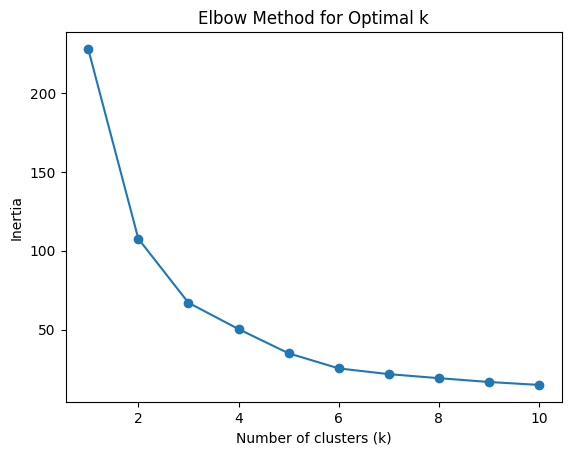

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = data[['UMR', 'PENGELUARAN/BULAN']]

#Penskalaan
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Kalo K-Means ++ ada intialisasi di awal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot dg Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Cari paling mendekati siku (++Lancip)
optimal_clusters = 4
# Jalankan K-Means++
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))
print("Clustered Data:")
print(data[['KABUPATEN/KOTA', 'UMR', 'PENGELUARAN/BULAN', 'Cluster']])

Cluster Centers:
[[2166333.39465753  873183.78995434]
 [4357314.74       1383229.16666667]
 [4119760.85266667 1000316.66666667]
 [2241161.885      1233898.14814815]]
Clustered Data:
           KABUPATEN/KOTA         UMR  PENGELUARAN/BULAN  Cluster
0             DKI JAKARTA  4573845.00       1.577250e+06        1
1    KABUPATEN PANDEGLANG  2800293.00       7.355833e+05        0
2         KABUPATEN LEBAK  2773590.00       7.378333e+05        0
3     KABUPATEN TANGERANG  4230793.00       1.035583e+06        2
4        KABUPATEN SERANG  4215181.00       9.096667e+05        2
..                    ...         ...                ...      ...
109         KOTA PASURUAN  2838837.64       1.150250e+06        3
110        KOTA MOJOKERTO  2510452.36       1.171167e+06        3
111           KOTA MADIUN  1991105.79       1.375250e+06        3
112         KOTA SURABAYA  4375479.19       1.528750e+06        1
113             KOTA BATU  2830367.09       1.091167e+06        3

[114 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###K-Means++

In [ ]:
pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

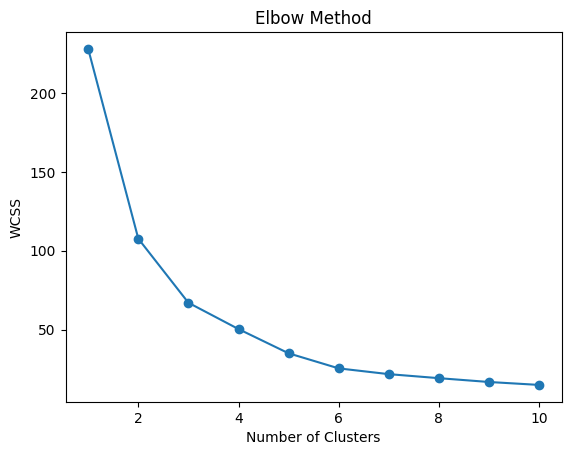

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

features = ['UMR', 'PENGELUARAN/BULAN']

X = data[features]

#Missing Value
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Penskalaan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Cari optimal dg Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Cari paling mendekati siku (++Lancip)
optimal_clusters = 4
# Jalankan K-Means++
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))
print("Clustered Data:")
print(data[['KABUPATEN/KOTA', 'UMR', 'PENGELUARAN/BULAN', 'Cluster']])

Cluster Centers:
[[2166333.39465753  873183.78995434]
 [4357314.74       1383229.16666667]
 [4119760.85266667 1000316.66666667]
 [2241161.885      1233898.14814815]]
Clustered Data:
           KABUPATEN/KOTA         UMR  PENGELUARAN/BULAN  Cluster
0             DKI JAKARTA  4573845.00       1.577250e+06        1
1    KABUPATEN PANDEGLANG  2800293.00       7.355833e+05        0
2         KABUPATEN LEBAK  2773590.00       7.378333e+05        0
3     KABUPATEN TANGERANG  4230793.00       1.035583e+06        2
4        KABUPATEN SERANG  4215181.00       9.096667e+05        2
..                    ...         ...                ...      ...
109         KOTA PASURUAN  2838837.64       1.150250e+06        3
110        KOTA MOJOKERTO  2510452.36       1.171167e+06        3
111           KOTA MADIUN  1991105.79       1.375250e+06        3
112         KOTA SURABAYA  4375479.19       1.528750e+06        1
113             KOTA BATU  2830367.09       1.091167e+06        3

[114 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from IPython.display import display
pd.set_option('display.max_rows', 250)
data

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
0,DKI JAKARTA,4573845.00,1.577250e+06,1
1,KABUPATEN PANDEGLANG,2800293.00,7.355833e+05,0
2,KABUPATEN LEBAK,2773590.00,7.378333e+05,0
3,KABUPATEN TANGERANG,4230793.00,1.035583e+06,2
4,KABUPATEN SERANG,4215181.00,9.096667e+05,2
5,KOTA TANGERANG,4285799.00,1.242417e+06,1
6,KOTA CILEGON,4340254.00,1.098750e+06,2
7,KOTA SERANG,3850526.00,1.142417e+06,2
8,KOTA TANGERANG SELATAN,4285799.00,1.333083e+06,1
9,KABUPATEN BOGOR,4217206.00,9.050000e+05,2


In [ ]:
import pandas as pd

output_file_path = 'hasil olahan.xlsx'
data.to_excel(output_file_path, index=False)
from google.colab import files
files.download(output_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Cluster 0

In [ ]:
data[data['Cluster']==0]

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
1,KABUPATEN PANDEGLANG,2800293.00,7.355833e+05,0
2,KABUPATEN LEBAK,2773590.00,7.378333e+05,0
10,KABUPATEN SUKABUMI,3125444.72,7.675000e+05,0
11,KABUPATEN CIANJUR,2699814.40,6.870000e+05,0
13,KABUPATEN GARUT,1975220.92,6.855833e+05,0
14,KABUPATEN TASIKMALAYA,2326772.46,6.814167e+05,0
15,KABUPATEN CIAMIS,1897867.14,7.856667e+05,0
16,KABUPATEN KUNINGAN,1908102.17,8.016667e+05,0
17,KABUPATEN CIREBON,2279982.77,8.992500e+05,0
18,KABUPATEN MAJALENGKA,2027619.04,8.291667e+05,0


##Cluster 1

In [ ]:
data1 = data[data['Cluster']==1]
data1

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
0,DKI JAKARTA,4573845.00,1.577250e+06,1
5,KOTA TANGERANG,4285799.00,1.242417e+06,1
8,KOTA TANGERANG SELATAN,4285799.00,1.333083e+06,1
29,KOTA BANDUNG,3774860.78,1.469917e+06,1
31,KOTA BEKASI,4816921.17,1.353250e+06,1
32,KOTA DEPOK,4377231.93,1.327167e+06,1
90,KABUPATEN SIDOARJO,4368581.85,1.234000e+06,1
112,KOTA SURABAYA,4375479.19,1.528750e+06,1


In [ ]:
import pandas as pd

output_file_path = 'cluster 1.xlsx'
data1.to_excel(output_file_path, index=False)
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Cluster 2

In [ ]:
data2 = data[data['Cluster']==2]
data2

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
3,KABUPATEN TANGERANG,4230793.00,1.035583e+06,2
4,KABUPATEN SERANG,4215181.00,9.096667e+05,2
6,KOTA CILEGON,4340254.00,1.098750e+06,2
7,KOTA SERANG,3850526.00,1.142417e+06,2
9,KABUPATEN BOGOR,4217206.00,9.050000e+05,2
12,KABUPATEN BANDUNG,3241929.67,8.823333e+05,2
19,KABUPATEN SUMEDANG,3241929.67,8.980000e+05,2
22,KABUPATEN PURWAKARTA,4173568.61,1.016083e+06,2
23,KABUPATEN KARAWANG,4798312.00,9.939167e+05,2
24,KABUPATEN BEKASI,4791843.90,9.797500e+05,2


In [ ]:
import pandas as pd

output_file_path = 'cluster 1.xlsx'
data2.to_excel(output_file_path, index=False)
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Cluster 3

In [ ]:
data[data['Cluster']==3]

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
37,KABUPATEN BANTUL,1916848.00,1.333500e+06,3
39,KABUPATEN SLEMAN,2001000.00,1.369833e+06,3
40,KOTA YOGYAKARTA,2153970.00,1.609917e+06,3
49,KABUPATEN BOYOLALI,2010299.00,1.104167e+06,3
54,KABUPATEN SRAGEN,1839429.00,1.087667e+06,3
70,KOTA MAGELANG,1935913.00,1.068000e+06,3
71,KOTA SURAKARTA,2035720.00,1.288583e+06,3
72,KOTA SALATIGA,2128523.00,1.362583e+06,3
73,KOTA SEMARANG,2835021.00,1.337250e+06,3
74,KOTA PEKALONGAN,2156213.00,1.096500e+06,3


#Cek Karakteristik & Statistika Deskriptif

In [ ]:
data.describe()

,UMR,PENGELUARAN/BULAN,Cluster
count,1.140000e+02,1.140000e+02,114.000000
mean,2.588931e+06,9.826594e+05,0.807018
std,8.935254e+05,2.009399e+05,1.174035
min,1.819835e+06,6.814167e+05,0.000000
25%,1.959269e+06,8.409792e+05,0.000000
50%,2.123320e+06,9.279167e+05,0.000000
75%,2.837883e+06,1.066875e+06,2.000000
max,4.816921e+06,1.609917e+06,3.000000


In [ ]:
sorted = data.sort_values(by='UMR', ascending = False)
pilih_turun = sorted.head(10)
pilih_turun

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
31,KOTA BEKASI,4816921.17,1.353250e+06,1
23,KABUPATEN KARAWANG,4798312.00,9.939167e+05,2
24,KABUPATEN BEKASI,4791843.90,9.797500e+05,2
0,DKI JAKARTA,4573845.00,1.577250e+06,1
32,KOTA DEPOK,4377231.93,1.327167e+06,1
112,KOTA SURABAYA,4375479.19,1.528750e+06,1
100,KABUPATEN GRESIK,4372030.51,1.115333e+06,2
90,KABUPATEN SIDOARJO,4368581.85,1.234000e+06,1
89,KABUPATEN PASURUAN,4365133.19,8.938333e+05,2
91,KABUPATEN MOJOKERTO,4354787.17,1.087583e+06,2


In [ ]:
import pandas as pd

output_file_path = 'UMR tertinggi.xlsx'
pilih_turun.to_excel(output_file_path, index=False)
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sorted2 = data.sort_values(by='PENGELUARAN/BULAN', ascending = False)
pilih_turun2 = sorted2.head(10)
pilih_turun2

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
40,KOTA YOGYAKARTA,2153970.00,1.609917e+06,3
0,DKI JAKARTA,4573845.00,1.577250e+06,1
112,KOTA SURABAYA,4375479.19,1.528750e+06,1
29,KOTA BANDUNG,3774860.78,1.469917e+06,1
107,KOTA MALANG,2994143.98,1.408083e+06,3
111,KOTA MADIUN,1991105.79,1.375250e+06,3
39,KABUPATEN SLEMAN,2001000.00,1.369833e+06,3
72,KOTA SALATIGA,2128523.00,1.362583e+06,3
31,KOTA BEKASI,4816921.17,1.353250e+06,1
73,KOTA SEMARANG,2835021.00,1.337250e+06,3


In [ ]:
import pandas as pd

output_file_path = 'Pengeluran Tertinggi.xlsx'
pilih_turun2.to_excel(output_file_path, index=False)
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# True(Terkecil ke Terbesar)
sorted3 = data.sort_values(by=['UMR', 'PENGELUARAN/BULAN'], ascending =[False, False])
pilih_turun3 = sorted3.head(114)
pilih_turun3

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
31,KOTA BEKASI,4816921.17,1.353250e+06,1
23,KABUPATEN KARAWANG,4798312.00,9.939167e+05,2
24,KABUPATEN BEKASI,4791843.90,9.797500e+05,2
0,DKI JAKARTA,4573845.00,1.577250e+06,1
32,KOTA DEPOK,4377231.93,1.327167e+06,1
112,KOTA SURABAYA,4375479.19,1.528750e+06,1
100,KABUPATEN GRESIK,4372030.51,1.115333e+06,2
90,KABUPATEN SIDOARJO,4368581.85,1.234000e+06,1
89,KABUPATEN PASURUAN,4365133.19,8.938333e+05,2
91,KABUPATEN MOJOKERTO,4354787.17,1.087583e+06,2


In [ ]:
# True(Terkecil ke Terbesar)
sorted4 = data.sort_values(by=['PENGELUARAN/BULAN', 'UMR'], ascending =[False, False])
pilih_turun4 = sorted4.head(114)
pilih_turun4

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
40,KOTA YOGYAKARTA,2153970.00,1.609917e+06,3
0,DKI JAKARTA,4573845.00,1.577250e+06,1
112,KOTA SURABAYA,4375479.19,1.528750e+06,1
29,KOTA BANDUNG,3774860.78,1.469917e+06,1
107,KOTA MALANG,2994143.98,1.408083e+06,3
111,KOTA MADIUN,1991105.79,1.375250e+06,3
39,KABUPATEN SLEMAN,2001000.00,1.369833e+06,3
72,KOTA SALATIGA,2128523.00,1.362583e+06,3
31,KOTA BEKASI,4816921.17,1.353250e+06,1
73,KOTA SEMARANG,2835021.00,1.337250e+06,3


In [ ]:
# True(Terkecil ke Terbesar)
sorted4 = data.sort_values(by=['UMR', 'PENGELUARAN/BULAN'], ascending =[True, False])
pilih_naikturun = sorted4.head(114)
pilih_naikturun

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
44,KABUPATEN BANJARNEGARA,1819835.00,8.146667e+05,0
52,KABUPATEN WONOGIRI,1839043.00,8.150000e+05,0
54,KABUPATEN SRAGEN,1839429.00,1.087667e+06,3
35,KOTA BANJAR,1852099.52,9.139167e+05,0
57,KABUPATEN REMBANG,1874322.00,9.114167e+05,0
26,KABUPATEN PANGANDARAN,1884364.08,7.824167e+05,0
69,KABUPATEN BREBES,1885019.00,8.761667e+05,0
63,KABUPATEN TEMANGGUNG,1887832.00,8.144167e+05,0
55,KABUPATEN GROBOGAN,1894032.00,8.841667e+05,0
15,KABUPATEN CIAMIS,1897867.14,7.856667e+05,0


In [ ]:
# True(Terkecil ke Terbesar)
sorted4 = data.sort_values(by=['PENGELUARAN/BULAN', 'UMR'], ascending =[False, True])
pilih_turunnaik = sorted4.head(114)
pilih_turunnaik

,KABUPATEN/KOTA,UMR,PENGELUARAN/BULAN,Cluster
40,KOTA YOGYAKARTA,2153970.00,1.609917e+06,3
0,DKI JAKARTA,4573845.00,1.577250e+06,1
112,KOTA SURABAYA,4375479.19,1.528750e+06,1
29,KOTA BANDUNG,3774860.78,1.469917e+06,1
107,KOTA MALANG,2994143.98,1.408083e+06,3
111,KOTA MADIUN,1991105.79,1.375250e+06,3
39,KABUPATEN SLEMAN,2001000.00,1.369833e+06,3
72,KOTA SALATIGA,2128523.00,1.362583e+06,3
31,KOTA BEKASI,4816921.17,1.353250e+06,1
73,KOTA SEMARANG,2835021.00,1.337250e+06,3
